In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import cv2
import os
import uuid

In [3]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(7, 7))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j,:,:,-1], cmap='gray')
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

In [4]:
generator_network = tf.keras.models.load_model(os.getcwd() + '\\generator')
generator_network.compile()

Text(0.5, 1.0, 'inf')

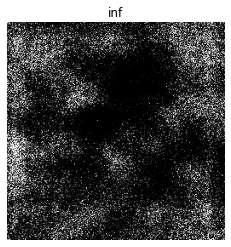

In [100]:
sample_img = get_fake_samples(generator_network, 1, 50).reshape((256, 256))

plt.axis('off')
plt.imshow(sample_img, cmap='gray')
plt.title(np.linalg.det(sample_img))

In [102]:
count = 0

while count <= 1000:
    sample_img = get_fake_samples(generator_network, 1, 50).reshape((256, 256))

    if not np.isinf(np.linalg.det(sample_img)):
        sample_img *= 255
        filename = os.getcwd() + '\\generated_samples\\aggresome_' + str(uuid.uuid1()) + '.png'
        print(filename)
        cv2.imwrite(filename, sample_img)
        count += 1

c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_103f4a43-c958-11ec-aff2-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_109002b9-c958-11ec-8f4d-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_10b78136-c958-11ec-b16a-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_10c53cdf-c958-11ec-9cda-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_10d23533-c958-11ec-8ab0-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_1114954d-c958-11ec-8716-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_112b0371-c958-11ec-8de0-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_113d04d6-c958-11ec-9b2f-2816a8472d59.png
c:\Users\nikhi\OneDrive\Documents\gan testing\generated_samples\aggresome_115017

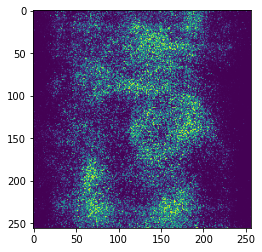

In [42]:
sample_img = get_fake_samples(generator_network, 1, 50).reshape((256, 256))

plt.imshow(sample_img)

In [12]:
def convolve2D(image, kernel, padding=0, strides=1):
    # cross correlation
    kernel = np.flipud(np.fliplr(kernel))

    # gather shapes of kernel + image + padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # shape of output convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        # print(imagePadded)
    else:
        imagePadded = image

    # iterate through image
    for y in range(image.shape[1]):
        # exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # only Convolve if y has gone down by the specified strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

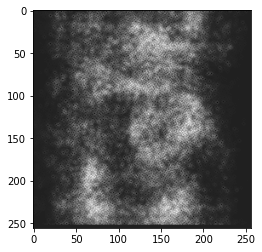

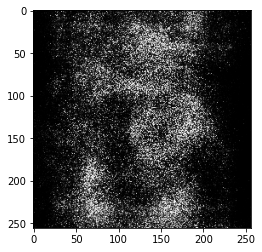

In [43]:
kernel = np.array([[1, 1, 5, 1, 1], [1, 5, 5, 5, 1], [5, 5, -10, 5, 5], [1, 5, 5, 5, 1], [1, 1, 5, 1, 1]])

output = convolve2D(sample_img, kernel, padding=2)

plt.imshow(output, cmap='gray')
plt.show()
plt.imshow(sample_img, cmap='gray')
plt.show()